In [2]:
from pyspark import SparkConf, SparkContext
import numpy as np
import os
import time

In [3]:
sc.stop()
conf = SparkConf().setMaster("local").setAppName("k-means")
sc = SparkContext(conf=conf)

In [4]:
def mapper1(x):
    list_ = []
    for i in x.split(' '):
        list_.append(float(i))
    return tuple(list_)


def manhattan(x):
    list_ = []
    for node in x[1]:
        tmp = 0
        for j in range(58):
            tmp = tmp + abs((x[0][1][j]) - node[1][j])
        list_.append((node, tmp))
    tmp = list_[0]
    for check in list_:
        if tmp[1] > check[1]:
            tmp = check
#     list_ = sorted(list_, key = lambda s: s[1])
    
    
    return (((tmp[0]),(x[0],tmp[1])))


def euclidean(x):
    list_ = []
    for node in x[1]:
        tmp = 0
        for j in range(58):
            tmp = tmp + ((x[0][1][j]) - node[1][j])**2
        list_.append((node, tmp))
    tmp = list_[0]
    for check in list_:
        if tmp[1] > check[1]:
            tmp = check
#     list_ = sorted(list_, key = lambda s: s[1])
    
    
    return (((tmp[0]),(x[0],tmp[1])))

def cal_cost(x):
    total_cost = 0
    for i in x[1]:
        total_cost += i[1]
    return (x[0],total_cost)

def new_cen(x):
    new_centroid = [0] * 58
    total_point = 0
    for point in x[1]:
        total_point += 1
        for i in range(58):
            new_centroid[i] += point[0][1][i]
    for i in range(58):
        new_centroid[i]/=total_point
    
    return (tuple((x[0][0],tuple(new_centroid))))
        
    

def mapper3(x):
    list_ = [0] * 58
    points_num = 0
    for points in x[1]:
        points_num += 1
        for j in range(58):
            list_[j] += points[j]
    for i in range(58):
        list_[i]/=points_num
    return (tuple(list_))

In [8]:
data = sc.textFile("/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/hw3-q2-kmeans/data.txt").map(mapper1)
centroid = sc.textFile("/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/hw3-q2-kmeans/c1.txt").map(mapper1)
data = data.zipWithIndex().map(lambda x: (x[1],x[0])) # (index, (vector))
centroid = centroid.zipWithIndex().map(lambda x: (x[1],x[0])) #(index, (vector))






cost_c1 = []
for i in range(20):
    join_data = data.cartesian(centroid).groupByKey().mapValues(tuple) # (point, (centroid1, centroid2, ......))
    join_data = join_data.map(euclidean) # (centroid, point, cost)
    cost = join_data.groupByKey().mapValues(tuple).map(cal_cost) # total cost (old_centroid, cost)
    centroid = join_data.groupByKey().mapValues(tuple).map(new_cen) # new_centroid (vec)
    
    cost_list = cost.map(lambda x : x[1]).sum()
    print(cost_list)
    cost_c1.append(cost_list)

print(cost_c1)

euclidean_c1_centroid = centroid

centroid = sc.textFile("/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/hw3-q2-kmeans/c2.txt").map(mapper1)
centroid = centroid.zipWithIndex().map(lambda x: (x[1],x[0])) #(index, (vector))


cost_c2 = []
for i in range(20):
    join_data = data.cartesian(centroid).groupByKey().mapValues(tuple) # (point, (centroid1, centroid2, ......))
    join_data = join_data.map(euclidean) # (centroid, point, cost)
    cost = join_data.groupByKey().mapValues(tuple).map(cal_cost) # total cost (old_centroid, cost)
    centroid = join_data.groupByKey().mapValues(tuple).map(new_cen) # new_centroid (vec)

    cost_list = cost.map(lambda x : x[1]).sum()
    print(cost_list)
    cost_c2.append(cost_list)

print(cost_c2)

euclidean_c2_centroid = centroid
    

    











623660345.3064116
509862908.29754496
485480681.87200814
463997011.6850126
460969266.57299644
460537847.9827681
460313099.6535454
460003523.8894074
459570539.31773514
459021103.34229106
458490656.191981
457944232.5879744
457558005.198677
457290136.3523022
457050555.05956286
456892235.615355
456703630.73703384
456404203.01897496
456177800.5419933
455986871.02734596
[623660345.3064116, 509862908.29754496, 485480681.87200814, 463997011.6850126, 460969266.57299644, 460537847.9827681, 460313099.6535454, 460003523.8894074, 459570539.31773514, 459021103.34229106, 458490656.191981, 457944232.5879744, 457558005.198677, 457290136.3523022, 457050555.05956286, 456892235.615355, 456703630.73703384, 456404203.01897496, 456177800.5419933, 455986871.02734596]
438747790.02791744
249803933.62600327
194494814.4063124
169804841.45154327
156295748.80627644
149094208.108966
142508531.61961505
132303869.40652953
117170969.8371906
108547377.17856997
102237203.317996
98278015.7497566
95630226.12177399
93793314.

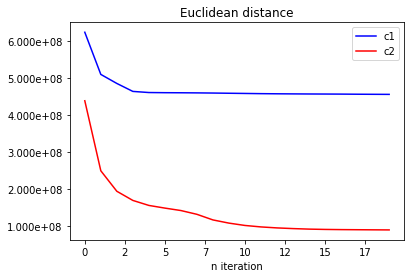

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
title = "Euclidean distance"
fig = plt.figure()

ax = fig.add_subplot(111)

# x = np.linspace(0, 300, 20)

# y = np.linspace(0,300, 20)
# y = y*1e16

ax.plot(cost_c1, '-b', label='c1')
ax.plot(cost_c2, '-r', label='c2')
plt.xlabel("n iteration")
plt.legend(loc='upper right')
plt.title(title)

# save image
plt.savefig("Euclidean_distance.png")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()

In [10]:
import csv


with open('Euclidean_distance.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow([' ','C1','C2'])
    for i in range(20):
         writer.writerow(['iteration'+str(i+1),cost_c1[i],cost_c2[i]])

In [11]:
data = sc.textFile("/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/hw3-q2-kmeans/data.txt").map(mapper1)
centroid = sc.textFile("/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/hw3-q2-kmeans/c1.txt").map(mapper1)
data = data.zipWithIndex().map(lambda x: (x[1],x[0])) # (index, (vector))
centroid = centroid.zipWithIndex().map(lambda x: (x[1],x[0])) #(index, (vector))




# print(join_data.collect()[0])

cost_c1_mahanttan = []
for i in range(20):
    join_data = data.cartesian(centroid).groupByKey().mapValues(tuple) # (point, (centroid1, centroid2, ......))
    join_data = join_data.map(manhattan) # (centroid, point, cost)
    cost = join_data.groupByKey().mapValues(tuple).map(cal_cost) # total cost (old_centroid, cost)
    centroid = join_data.groupByKey().mapValues(tuple).map(new_cen) # new_centroid (vec)

    cost_list = cost.map(lambda x : x[1]).sum()
    print(cost_list)
    cost_c1_mahanttan.append(cost_list)

print(cost_c1_mahanttan)

manhanttan_c1_centroid = centroid


centroid = sc.textFile("/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/hw3-q2-kmeans/c2.txt").map(mapper1)
centroid = centroid.zipWithIndex().map(lambda x: (x[1],x[0])) #(index, (vector))


cost_c2_mahanttan = []
for i in range(20):
    join_data = data.cartesian(centroid).groupByKey().mapValues(tuple) # (point, (centroid1, centroid2, ......))
    join_data = join_data.map(manhattan) # (centroid, point, cost)
    cost = join_data.groupByKey().mapValues(tuple).map(cal_cost) # total cost (old_centroid, cost)
    centroid = join_data.groupByKey().mapValues(tuple).map(new_cen) # new_centroid (vec)

    cost_list = cost.map(lambda x : x[1]).sum()
    print(cost_list)
    cost_c2_mahanttan.append(cost_list)



print(cost_c2_mahanttan)
    
manhanttan_c2_centroid = centroid
    











550117.1419999998
464869.2758792974
470897.3822772979
483914.4091733449
489216.071003429
487629.6685499797
483711.9232137457
475330.7734932314
474871.2388463609
457232.9201150774
447494.38619735045
450915.0125766771
451250.3670725653
451974.59553974966
451570.36406995705
452739.01136645576
453082.7302871836
450583.67086029827
450368.74931674154
449011.36372551887
[550117.1419999998, 464869.2758792974, 470897.3822772979, 483914.4091733449, 489216.071003429, 487629.6685499797, 483711.9232137457, 475330.7734932314, 474871.2388463609, 457232.9201150774, 447494.38619735045, 450915.0125766771, 451250.3670725653, 451974.59553974966, 451570.36406995705, 452739.01136645576, 453082.7302871836, 450583.67086029827, 450368.74931674154, 449011.36372551887]
1433739.3099999945
1084488.7769648735
973431.7146620393
895934.59256307
865128.3352940815
845846.6470313488
827219.5827561258
803590.3456011111
756039.5172761176
717332.9025432293
694587.9252526911
684444.5019967889
674574.7475478547
667409.469916

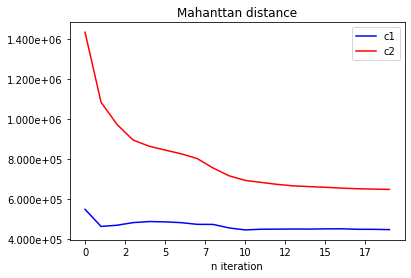

In [13]:
title = "Mahanttan distance"
fig = plt.figure()

ax = fig.add_subplot(111)

# x = np.linspace(0, 300, 20)

# y = np.linspace(0,300, 20)
# y = y*1e16

ax.plot(cost_c1_mahanttan, '-b', label='c1')
ax.plot(cost_c2_mahanttan, '-r', label='c2')
plt.xlabel("n iteration")
plt.legend(loc='upper right')
plt.title(title)

# save image
plt.savefig("mahanttan_distance.png")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()

In [14]:
with open('manhanttan_distance.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow([' ','C1','C2'])
    for i in range(20):
         writer.writerow(['iteration'+str(i+1),cost_c1_mahanttan[i],cost_c2_mahanttan[i]])

In [15]:

dis_euclidean_c1_euclidean = np.empty(shape=(10,10))
dis_euclidean_c1_euclidean.fill(0)

dis_manhattan_c1_manhattan = np.empty(shape=(10,10))
dis_manhattan_c1_manhattan.fill(0)

dis_euclidean_c2_euclidean = np.empty(shape=(10,10))
dis_euclidean_c2_euclidean.fill(0)

dis_manhattan_c2_manhattan = np.empty(shape=(10,10))
dis_manhattan_c2_manhattan.fill(0)

c1_tmp = sorted(euclidean_c1_centroid.collect(), key = lambda s: s[0])
c1_ = []

for i in range(10):
    c1_.append(np.array(c1_tmp[i][1]))
c1_ = np.array(c1_)




c2_tmp = sorted(euclidean_c2_centroid.collect(), key = lambda s: s[0])
c2_ = []
for i in range(10):
    c2_.append(np.array(c2_tmp[i][1]))
c2_ = np.array(c2_)


for i in range(10):
    for j in range(i, 10):
        tmp = c1_[i] - c1_[j]
        sum_squared = np.dot(tmp.T, tmp)
        result = np.sqrt(sum_squared)
        dis_euclidean_c1_euclidean[i][j] = round(result, 3)
        tmp = c2_[i] - c2_[j]
        sum_squared = np.dot(tmp.T, tmp)
        result = np.sqrt(sum_squared)
        dis_euclidean_c2_euclidean[i][j] = round(result, 3)
        
for i in range(10):
    for j in range(i, 10):
        dis_manhattan_c1_manhattan[i][j] = round(sum(abs(c1_[i] - c1_[j])), 3)
        dis_manhattan_c2_manhattan[i][j] = round(sum(abs(c2_[i] - c2_[j])), 3)
                                  
        

# for i in range(10):
#     print(dis_euclidean_c1_euclidean[i])
    
# for i in range(10):
#     print(dis_manhattan_c1_manhattan[i])

In [16]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/euclidean_c1_euclidean.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_euclidean_c1_euclidean[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [17]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/euclidean_c1_mahattan.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_manhattan_c1_manhattan[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [18]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/euclidean_c2_euclidean.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_euclidean_c2_euclidean[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [19]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/euclidean_c2_mahattan.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_manhattan_c2_manhattan[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [20]:

dis_euclidean_c1_euclidean = np.empty(shape=(10,10))
dis_euclidean_c1_euclidean.fill(0)

dis_manhattan_c1_manhattan = np.empty(shape=(10,10))
dis_manhattan_c1_manhattan.fill(0)

dis_euclidean_c2_euclidean = np.empty(shape=(10,10))
dis_euclidean_c2_euclidean.fill(0)

dis_manhattan_c2_manhattan = np.empty(shape=(10,10))
dis_manhattan_c2_manhattan.fill(0)

c1_tmp = sorted(manhanttan_c1_centroid.collect(), key = lambda s: s[0])

c1_ = []

for i in range(10):
    c1_.append(np.array(c1_tmp[i][1]))
c1_ = np.array(c1_)




c2_tmp =sorted(manhanttan_c2_centroid.collect(), key = lambda s: s[0])
c2_ = []
for i in range(10):
    c2_.append(np.array(c2_tmp[i][1]))
c2_ = np.array(c2_)


for i in range(10):
    for j in range(i, 10):
        tmp = c1_[i] - c1_[j]
        sum_squared = np.dot(tmp.T, tmp)
        result = np.sqrt(sum_squared)
        dis_euclidean_c1_euclidean[i][j] = round(result, 3)
        tmp = c2_[i] - c2_[j]
        sum_squared = np.dot(tmp.T, tmp)
        result = np.sqrt(sum_squared)
        dis_euclidean_c2_euclidean[i][j] = round(result, 3)
        
for i in range(10):
    for j in range(i, 10):
        dis_manhattan_c1_manhattan[i][j] = round(sum(abs(c1_[i] - c1_[j])), 3)
        dis_manhattan_c2_manhattan[i][j] = round(sum(abs(c2_[i] - c2_[j])), 3)
                                  
        

# for i in range(10):
#     print(dis_euclidean_c1_euclidean[i])
    
# for i in range(10):
#     print(dis_manhattan_c1_manhattan[i])

In [21]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/manhattan_c1_euclidean.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_euclidean_c1_euclidean[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [22]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/mahattan_c1_manhattan.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_manhattan_c1_manhattan[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [23]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/mahattan_c2_euclidean.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_euclidean_c2_euclidean[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      

In [24]:
with open('/Users/haoweichung/Desktop/清大/Senior/data_mining/HW3/mahattan_c2_mahattan.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['Euclidean','1','2','3','4','5','6','7','8','9','10'])
    for i in range(10):
        list_ = []
        list_.append(i+1)
        
        for index,element in enumerate(dis_manhattan_c2_manhattan[i]):
            if index >= i:
                list_.append(element)
            else:
                list_.append(' ')
            
        writer.writerow(list_)      